In [1]:
# Import necessary libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from glob import glob
import cv2


C:\Users\jovan\AppData\Local\Programs\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.6058 - loss: 0.8657 - val_accuracy: 0.8667 - val_loss: 0.3470
Epoch 2/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8918 - loss: 0.2846 - val_accuracy: 0.9111 - val_loss: 0.2436
Epoch 3/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9413 - loss: 0.1751 - val_accuracy: 0.9022 - val_loss: 0.2691
Epoch 4/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9546 - loss: 0.1375 - val_accuracy: 0.9156 - val_loss: 0.2278
Epoch 5/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9680 - loss: 0.0928 - val_accuracy: 0.9467 - val_loss: 0.1794
Epoch 6/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9695 - loss: 0.1019 - val_accuracy: 0.9244 - val_loss: 0.2246
Epoch 7/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9790 - loss: 0.0697 - val_accuracy: 0.9467 - val_loss: 0.1499
Epoch 8/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9872 - loss: 0.0417 - val_accuracy: 0.9667 - v

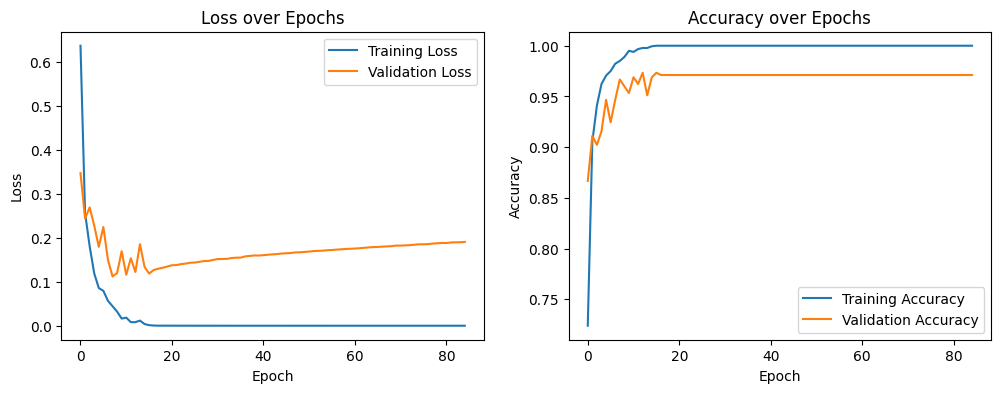

Epoch 1/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9958 - loss: 0.0151 - val_accuracy: 0.9600 - val_loss: 0.2179
Epoch 2/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9289 - val_loss: 0.3211
Epoch 3/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9422 - val_loss: 0.3091
Epoch 4/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9842 - loss: 0.0459 - val_accuracy: 0.9267 - val_loss: 0.2772
Epoch 5/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9921 - loss: 0.0190 - val_accuracy: 0.9556 - val_loss: 0.1601
Epoch 6/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9980 - loss: 0.0094 - val_accuracy: 0.9489 - val_loss: 0.2398
Epoch 7/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9975 - loss: 0.0044 - val_accuracy: 0.9689 - val_loss: 0.1225
Epoch 8/85
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 1.0000 - loss: 6.0158e-04 - val_accuracy: 0.9689

In [2]:
# Function to load and preprocess images

def load_images_from_folder(folder):  # Takes a folder name as input and loads all images and their labels from that folder to store
    images = []
    labels = []
    for filename in os.listdir(folder):  # Lists all files in the specified folder
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (102, 136))  # Resize to ensure all images have the same shape
            images.append(img)
            if folder == 'Boot':
                labels.append(0)
            elif folder == 'Sandal':
                labels.append(1)
            elif folder == 'Shoe':
                labels.append(2)
    return images, labels  # Returns the lists of images and labels

# Load images and labels from the respective folders
boot_images, boot_labels = load_images_from_folder('Boot')
sandal_images, sandal_labels = load_images_from_folder('Sandal')
shoe_images, shoe_labels = load_images_from_folder('Shoe')

# Concatenate the images and labels from the three categories into single lists
images = boot_images + sandal_images + shoe_images
labels = boot_labels + sandal_labels + shoe_labels

# Convert into NumPy arrays for efficiency & required for numerical input to the neural network
images = np.array(images)
labels = np.array(labels)

# Split dataset into training and testing sets with random state set for consistency in results
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1 b dividing by 255, which is a common preprocessing step for image data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Initialize the CNN model
model = models.Sequential()

# Add the first convolutional layer, 2D convolutional layer with 32 filters, a kernel size of 3x3, 
#'same' padding, ReLU activation, and an input shape matching the dimensions of the images (136x102 pixels, 3 color channels)
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(136, 102, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Add 3 additional convolutional and pooling layers via linear increase of the filters 16, 32, 48 ,and 64 features
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the data to a 1D array
model.add(layers.Flatten())

# Add dense fully connected and output layer
model.add(layers.Dense(64, activation='relu'))  #  Fully connected layer    
model.add(layers.Dense(3, activation='softmax'))  # Match the number of classes in the classification task

# Compile the model with the 3 parameters specified
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=85, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot the loss and accuracy graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Compare optimizers (example with two other optimizers)
optimizers = ['adam', 'sgd', 'rmsprop']
for opt in optimizers:
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=85, 
                        validation_data=(test_images, test_labels))
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy with {opt}: {test_acc}')


In [5]:
Interpretations ='''

1. Browse the Kaggle "Datasets," located in the topic Resources.
Competed: Filtered and looked over many datasets to make a selection appropriate for the CNN model via the assignment details. 

2. Select one dataset for your project.
Completed: The dataset "Shoe vs Sandal vs Boot Image Dataset (15K Images)" was selected from Kaggle at the link below and in the references
https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

3. Write a short description of the dataset and what your CNN will recognize.
Dataset Description:
This Shoe vs Sandal vs Boot Image Dataset contains 15,000 images of shoes, sandals, and boots. There are 5,000 images for each category. 
The images have a resolution of 136x102 pixels in RGB color model. While this dataset contained 15,000 images, only 2250 were used for the
model (750 for each of the 3 categories) because it was seen that this number of images was sufficient to highly train the model to be 
accurate while also adhering to computational efficiency. Striking this balance was critical because using the entire dataset would have 
likely resulted in a training time of over 3 hours! Using the reduced dataset kept the training under 30 minutes. 

Problem Statement:
The primary goal of this project is to design, build, and train a Convolutional Neural Network (CNN) to effectively classify images of shoes, 
sandals, and boots. The dataset used for this task consists of 15,000 images, evenly distributed across three categories: 5,000 images of 
shoes, 5,000 images of sandals, and 5,000 images of boots. Each image has a resolution of 136x102 pixels and is represented in the RGB color model.

The objective of this project extends beyond simply training a CNN; it aims to achieve as close to 100% accuracy as possible in classifying 
the footwear images. This high level of accuracy is crucial for validating the model's effectiveness and ensuring its reliability in practical 
applications. The process involves several critical steps: selecting an appropriate dataset, preprocessing the data, building the CNN architecture, 
training the model, and evaluating its performance.

The specific objectives of this assignment and what the CNN will recognize include:

- Data Preprocessing: Implement necessary preprocessing steps to prepare the dataset for training, including resizing images, normalizing pixel 
  values, and splitting the data into training and testing sets.
- CNN Initialization and Configuration: Initialize a CNN model and configure its architecture by adding convolutional layers, pooling layers, and 
  fully connected layers. Each layer's parameters (filters, kernel size, padding, activation functions, etc.) should be carefully chosen to optimize 
  the model's performance.
- Training the Model: Train the CNN using the prepared dataset, ensuring to monitor the model's performance and adjust training parameters such as 
  epochs and batch size to improve accuracy.
- Performance Evaluation: Evaluate the trained model on the test dataset, analyzing its accuracy and loss metrics. Additionally, compare different 
  optimizers (e.g., Adam, SGD, RMSprop) to identify which one provides the best performance.
- Documentation and Reporting: Write a comprehensive technical report detailing the problem statement, solution algorithm, analysis of findings, 
  and references including all code, comments, outputs, plots, and a thorough discussion of the model's ability to classify images accurately.

By following these steps, the project aims to develop a robust CNN model capable of distinguishing between shoes, sandals, and boots with high 
precision, demonstrating the practical utility of deep learning in image classification tasks.

4. Import the appropriate libraries: tensorflow, keras, numpy, glob, matplotlib, MaxPooling2D, and any others that would fit your model.
Completed: Imported via the Jupyter notebook as a precursor to executing the code for the training model. Also, prior to initializing the training
model, the data was split 80/20 train/test and the pixels for all images were normalized to between 0 and 1 by dividing by 255 given that digital 
images typically have pixel values ranging from 0 to 255 for each of the RGB color channels. the 

5. Initialize the CNN.
The CNN model was initialized using the Sequential model from Keras because is a simple and convenient way to build neural networks layer by layer
in a linear order and helps with visualizing the architecture of the CNN. Also, CNNs typically have a straightforward, sequential structure where 
each layer’s output is the next layer’s input, so the Sequential model works well for this workflow.

6. Utilize the following arguments to add a convolutional layer: Filters, Kernel_size, Padding, Activation Function – Relu, and Input shape.
Completed: Added the first convolutional layer with settings, 2D convolutional layer, 16 filters, a kernel size of 3x3, #'same' padding, 
ReLU activation, and an input shape matching the dimensions of the images (136x102 pixels, 3 color channels). A 2D layer was used because 
the input data consists of images, which are inherently 2-dimensional (height and width). The number of filters (also called kernels) in each 
convolutional layer determines the number of features the layer can extract from the input image, where more filters allow the layer to 
capture more complex and varied features but with higher computational cost. The kernel size 3x3 was chosen because it's one of the most 
common choices striking a good balance between capturing fine details and maintaining computational efficiency as compared to a 2x2 or 4x4. 
Padding refers to adding extra pixels around the input image to control the spatial dimensions of the output. Setting padding to 'same' 
ensures that the output feature map has the same spatial dimensions as the input. The ReLU activation function introduces non-linearity to 
the model. The input shape specifies the shape of the input image (136x102 pixels with 3 color channels) which is important for training
of the model with consistent image sizes; subsequent layers do not need the input shape specified because Keras infers it automatically. 

7. Down sample the images by applying a pooling operation.
Completed: Added a max pooling layer with a pool size of 2x2, which reduces the spatial dimensions of the output by a factor of 2 compared to the
4x4 default size. This technique used in CNNs to reduce the spatial dimensions (width and height) of the input volume, thereby reducing the 
computational complexity and the number of parameters in the network leading to faster training, reduced memory usage, and other benefits.

8. Did you choose max pooling, average pooling, or global pooling? Explain which type of pooling you used and why. What are the advantages and 
disadvantages of your pooling choice?
Completed: Max pooling was chosen because it is one of the most commonly used pooling methods in CNNs due to its simplicity and effectiveness in 
down-sampling feature maps. For this particular assignment and task at hand, max pooling was most appropriate because it preserves the most 
prominent features of an image by selecting the maximum value (pixel) in each pooling window, which helps in retaining important details and edges 
in the image that are crucial for object recognition and classification tasks. This method is also good for reducing the image size and giving
the property of translation invariance, which is the ability to recognize an object even if it is translated (moved) to different positions 
within the image; this is critical for the robustness of image recognition and classification. Average pooling takes the average of all values 
in each pooling window and is beneficial in scenarios where the overall structure is more important than the presence of sharp features, but 
loses important details and edges which is detrimental to recognition and classification tasks. Global pooling takes the maximum or average 
value over the entire spatial dimensions of the feature map, reducing the feature map to a single value per feature map. This can result in a 
significant loss of important features and context making it not optimal for the image recognition and classification task being done here. 

9. Repeat steps 5–7 to add 3 more convolutional layers.
Completed: Three additional convolution layers were added via linear increase of the filters 16 (in layer 1), 32, 48 ,and 64 filters. This
created a total of four convolution layers all with the same settings as the first layer as described above. 

10. Convert the dataset into a 1-D array for input into the next layer (flattening the dataset), which is fully linked.
Completed: Code added to flatten to a 1D array that is fully linked.

11. Use the dense class to create a fully connected layer (relu activation) and output one (softmax activation).
Completed: Code added to create a dense fully connected relu activation layer with 64 filters, and a fully connected output layer with 3
filters, to match the number of classes, with softmax activation for classification.

12. Train, then appraise the CNN you just created. Compile the CNN model using compile, with three parameters:
- Loss Function: use categorical_crossentropy
- Optimizer: your choice (Adam, Momentum, Nesterov Accelerated Gradient, or Min-Batch Gradient Descent).
- Metrics Arguments: Accuracy to evaluate performance. Fit the model on the training set with at least 85 iterations (epochs). Evaluate the 
  result. Compare the accuracy and loss function for both the training and test dataset. Plot the loss graph. Plot the accuracy graph.
Completed: Code added to compile and train the model with set parameters and outputs for the specified loss function, optimizer, and metrics. 

13. Discuss how the CNN model is utilized in recognizing the images from the dataset and which optimizer provides for the performance model 
(highest accuracy and how many times to get to that level) the overall performance of your model. Justify your choice of optimizer by 
comparing it to two other optimizers.

This CNN model is trained on the dataset over multiple epochs, where each epoch represents one complete pass through the training data. During 
training, the model learns to minimize the loss function, which measures the difference between the predicted and actual labels. Given a large 
enough training dataset and epochs run, the accuracy can reach near to 100% as is the desired performance. Comparing three different optimizers
for Adam, SGD, and RMSprop:the, the results are explained below:

Adam Optimizer (2nd comparison run)
Performance: Achieved a final test accuracy of 97.33%.
Epoch 1: Accuracy: 99.58%, Val_accuracy: 96.00%, Loss: 0.0151, Val_loss: 0.2179
Epoch 7: Accuracy: 99.75%, Val_accuracy: 96.89%, Loss: 0.0044, Val_loss: 0.1225
Stabilized at 97.33% validation accuracy from epoch 12 onwards.

SGD Optimizer
Performance: Achieved a final test accuracy of 97.33% but showed slower convergence compared to Adam.
Epoch 1: Accuracy: 100.00%, Val_accuracy: 97.33%, Loss: 0.00079, Val_loss: 0.2052
Stabilized at 97.33% validation accuracy from epoch the outset onwards.
Consistent performance but higher validation loss values 0.2055 compared to Adam 0.2052 and at the end of the training.

RMSprop Optimizer
Performance: Achieved a final test accuracy of 97.33%, similar to Adam and SGD, but with slightly different loss dynamics.
Epoch 1: Accuracy: 100.00%, Val_accuracy: 97.33%
Consistent performance similar to Adam and SGD.
Val_loss values were higher than those of Adam and SDG and finished at 0.2358.

Conclusion
Based on the analysis of training performance, convergence speed, and final validation loss, the Adam optimizer is the optimal choice for 
this CNN model. It provides fast convergence, achieves high accuracy quickly, and maintains a lower validation loss, which is crucial for 
effective and efficient model training. While SGD and RMSprop also achieve similar final accuracy, Adam's ability to stabilize quickly 
and minimize loss more effectively makes it the preferred optimizer for this application.

'''
    

In [6]:
References ='''

References:

Aggarwal, C. (2018). Neural networks and deep learning. Springer. ISBN-13: 9783319944623

Chollet, F. (2018, January 25). Building Powerful Image Classification Models Using Very Little Data. 
Retrieved from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Brownlee, J. (2019, August 14). How to Configure Image Data Augmentation in Keras. 
Retrieved from https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

O'Shea, K., & Nash, R. (2015). An Introduction to Convolutional Neural Networks. arXiv preprint arXiv:1511.08458. https://arxiv.org/abs/1511.08458

Muzdadid, H. A. (2022). Shoe vs Sandal vs Boot Image Dataset (15K Images). Retrieved from 
Kaggle. https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

Stack Overflow. (n.d.). Retrieved January, 2024, from https://stackoverflow.com/

Reddit. (n.d.). Retrieved January, 2024, from https://www.reddit.com/

GitHub. (n.d.). Retrieved January, 2024, from https://www.github.com/

Towards Data Science. (n.d.). Retrieved January, 2024, from https://towardsdatascience.com/

DataCamp Community. (n.d.). Retrieved January, 2024, from https://www.datacamp.com/community

Scikit-learn. (n.d.). Support vector machines. Retrieved from https://scikit-learn.org/stable/modules/svm.html

'''